In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField,StructType,BooleanType,DateType,IntegerType,StringType,DecimalType
from pyspark.sql.functions import col,sum,avg

In [2]:
spark = SparkSession.builder.appName("ipl_analysis").master("local[4]").getOrCreate()
spark.conf.set('spark.sql.repl.eagerEval.enabled', False)

In [3]:
SparkSession.getActiveSession()

In [4]:

ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [5]:
ball_by_ball_df = spark.read.csv("C:/Users/manas/Downloads/raghu543-ipl-data-till-2017/raghu543-ipl-data-till-2017/Ball_By_Ball.csv",inferSchema=True,header=True,schema=ball_by_ball_schema)

In [6]:
ball_by_ball_df.show(100,truncate=False)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|out_type      |caught|bowled|run_out|lbw |retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_sk|

In [7]:
ball_by_ball_df.printSchema()

root
 |-- match_id: integer (nullable = true)
 |-- over_id: integer (nullable = true)
 |-- ball_id: integer (nullable = true)
 |-- innings_no: integer (nullable = true)
 |-- team_batting: string (nullable = true)
 |-- team_bowling: string (nullable = true)
 |-- striker_batting_position: integer (nullable = true)
 |-- extra_type: string (nullable = true)
 |-- runs_scored: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- wides: integer (nullable = true)
 |-- legbyes: integer (nullable = true)
 |-- byes: integer (nullable = true)
 |-- noballs: integer (nullable = true)
 |-- penalty: integer (nullable = true)
 |-- bowler_extras: integer (nullable = true)
 |-- out_type: string (nullable = true)
 |-- caught: boolean (nullable = true)
 |-- bowled: boolean (nullable = true)
 |-- run_out: boolean (nullable = true)
 |-- lbw: boolean (nullable = true)
 |-- retired_hurt: boolean (nullable = true)
 |-- stumped: boolean (nullable = true)
 |-- caught_and_bowled: boolean (null

In [8]:
match_schema = StructType([StructField('Match_SK',IntegerType(),True),
 StructField('match_id',IntegerType(),True),
 StructField('Team1',StringType(),True),
 StructField('Team2',StringType(),True),
 StructField('match_date',DateType(),True),
 StructField('Season_Year',IntegerType(),True),
 StructField('Venue_Name',StringType(),True),
 StructField('City_Name',StringType(),True),
 StructField('Country_Name',StringType(),True),
 StructField('Toss_Winner',StringType(),True),
 StructField('match_winner',StringType(),True),
 StructField('Toss_Name',StringType(),True),
 StructField('Win_Type',StringType(),True),
 StructField('Outcome_Type',StringType(),True),
 StructField( 'ManOfMach',StringType(),True),
 StructField('Win_Margin',IntegerType(),True),
 StructField('Country_id',IntegerType(),True)])

In [9]:
match_df = spark.read.csv("C:/Users/manas/Downloads/raghu543-ipl-data-till-2017/raghu543-ipl-data-till-2017/Match.csv",header=True,schema= match_schema)
match_df.printSchema()

root
 |-- Match_SK: integer (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- Team1: string (nullable = true)
 |-- Team2: string (nullable = true)
 |-- match_date: date (nullable = true)
 |-- Season_Year: integer (nullable = true)
 |-- Venue_Name: string (nullable = true)
 |-- City_Name: string (nullable = true)
 |-- Country_Name: string (nullable = true)
 |-- Toss_Winner: string (nullable = true)
 |-- match_winner: string (nullable = true)
 |-- Toss_Name: string (nullable = true)
 |-- Win_Type: string (nullable = true)
 |-- Outcome_Type: string (nullable = true)
 |-- ManOfMach: string (nullable = true)
 |-- Win_Margin: integer (nullable = true)
 |-- Country_id: integer (nullable = true)



In [10]:
player_schema = StructType([StructField('PLAYER_SK',IntegerType(),True),
 StructField('Player_Id',IntegerType(),True),
 StructField('Player_Name',StringType(),True),
 StructField('DOB',DateType(),True),
 StructField('Batting_hand',StringType(),True),
 StructField('Bowling_skill',StringType(),True),
 StructField('Country_Name',StringType(),True)])

In [11]:
player_df = spark.read.csv("C:/Users/manas/Downloads/raghu543-ipl-data-till-2017/raghu543-ipl-data-till-2017/Player.csv",header=True,schema=player_schema)

In [12]:
player_df.printSchema()

root
 |-- PLAYER_SK: integer (nullable = true)
 |-- Player_Id: integer (nullable = true)
 |-- Player_Name: string (nullable = true)
 |-- DOB: date (nullable = true)
 |-- Batting_hand: string (nullable = true)
 |-- Bowling_skill: string (nullable = true)
 |-- Country_Name: string (nullable = true)



In [13]:

player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [14]:
player_match_df = spark.read.csv("C:/Users/manas/Downloads/raghu543-ipl-data-till-2017/raghu543-ipl-data-till-2017/Player_match.csv",header=True,schema= player_match_schema)
player_match_df.printSchema()

root
 |-- player_match_sk: integer (nullable = true)
 |-- playermatch_key: decimal(10,0) (nullable = true)
 |-- match_id: integer (nullable = true)
 |-- player_id: integer (nullable = true)
 |-- player_name: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- batting_hand: string (nullable = true)
 |-- bowling_skill: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- role_desc: string (nullable = true)
 |-- player_team: string (nullable = true)
 |-- opposit_team: string (nullable = true)
 |-- season_year: integer (nullable = true)
 |-- is_manofthematch: boolean (nullable = true)
 |-- age_as_on_match: integer (nullable = true)
 |-- isplayers_team_won: boolean (nullable = true)
 |-- batting_status: string (nullable = true)
 |-- bowling_status: string (nullable = true)
 |-- player_captain: string (nullable = true)
 |-- opposit_captain: string (nullable = true)
 |-- player_keeper: string (nullable = true)
 |-- opposit_keeper: string (nullable = true)



In [15]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])
team_df= spark.read.csv("C:/Users/manas/Downloads/raghu543-ipl-data-till-2017/raghu543-ipl-data-till-2017/Team.csv",header=True,schema= team_schema)
team_df.printSchema()

root
 |-- team_sk: integer (nullable = true)
 |-- team_id: integer (nullable = true)
 |-- team_name: string (nullable = true)



In [16]:
# filter to include only valid deliveries(remove wide and no balls)
ball_by_ball_df = ball_by_ball_df.filter((ball_by_ball_df['noballs']==0) & (col('wides')==0))

In [17]:
total_and_avg_score = ball_by_ball_df.groupBy("match_id", "innings_no")\
                                    .agg(sum('runs_scored').alias('total_runs'),
                                         avg('runs_scored').alias('avg_runs'))


In [18]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

Windowspec = Window.partitionBy("match_id", "innings_no").orderBy("over_id")
ball_by_ball_df = ball_by_ball_df.withColumn("running_total_runs",sum("runs_scored").over(Windowspec))
ball_by_ball_df.select("match_id", "innings_no","over_id","running_total_runs").show(truncate=False)

+--------+----------+-------+------------------+
|match_id|innings_no|over_id|running_total_runs|
+--------+----------+-------+------------------+
|335987  |1         |1      |0                 |
|335987  |1         |1      |0                 |
|335987  |1         |1      |0                 |
|335987  |1         |1      |0                 |
|335987  |1         |1      |0                 |
|335987  |1         |1      |0                 |
|335987  |1         |2      |18                |
|335987  |1         |2      |18                |
|335987  |1         |2      |18                |
|335987  |1         |2      |18                |
|335987  |1         |2      |18                |
|335987  |1         |2      |18                |
|335987  |1         |3      |23                |
|335987  |1         |3      |23                |
|335987  |1         |3      |23                |
|335987  |1         |3      |23                |
|335987  |1         |3      |23                |
|335987  |1         

In [19]:
from pyspark.sql.functions import when, col

ball_by_ball_df = ball_by_ball_df.withColumn("high_impact_over",
                                             when((col("runs_scored") + col('extra_runs') > 6) | (col('bowler_wicket')), True)
                                             .otherwise(False))
ball_by_ball_df.show(2,truncate=False)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+----------------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|out_type      |caught|bowled|run_out|lbw |retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_matc

In [20]:
from pyspark.sql.functions import year,day,month
from pyspark.sql.functions import regexp_replace

match_df = match_df.withColumn("match_day", day('match_date')) \
                  .withColumn("match_month", month("match_date")) \
                  .withColumn("match_year", year("match_date"))

match_df = match_df.withColumn("win_margin_category",
                               when(col("Win_Margin") > 100, "high")
                               .otherwise(when((col("Win_Margin") >= 50) & (col("Win_Margin") < 100), "medium")
                                          .otherwise("low")))

match_df = match_df.withColumn('Venue_Name', regexp_replace(match_df['Venue_Name'], 'Punjab Cricket Association IS Bindra Stadium Mohali|Punjab Cricket Association IS Bindra Stadium, Mohali', 'Punjab Cricket Association Stadium, Mohali'))

match_df = match_df.withColumn("impact_toss_win",when((col("Toss_Winner")) == (col("match_winner")),"YES").otherwise("NO"))

match_df.show(2)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+---------+-----------+----------+-------------------+---------------+
|Match_SK|match_id|               Team1|               Team2|match_date|Season_Year|          Venue_Name| City_Name|Country_Name|         Toss_Winner|        match_winner|Toss_Name|Win_Type|Outcome_Type|  ManOfMach|Win_Margin|Country_id|match_day|match_month|match_year|win_margin_category|impact_toss_win|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+---------+-----------+----------+-------------------+---------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       

In [21]:
player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+
|PLAYER_SK|Player_Id|Player_Name| DOB|  Batting_hand|   Bowling_skill|Country_Name|
+---------+---------+-----------+----+--------------+----------------+------------+
|        0|        1| SC Ganguly|NULL| Left-hand bat|Right-arm medium|       India|
|        1|        2|BB McCullum|NULL|Right-hand bat|Right-arm medium| New Zealand|
+---------+---------+-----------+----+--------------+----------------+------------+
only showing top 2 rows



In [22]:
from pyspark.sql.functions import lower, regexp_replace

player_df = player_df.withColumn("Player_Name", lower(regexp_replace("Player_Name","[^a-zA-Z0-9 ]","")))
player_df = player_df.na.fill({"Batting_hand":"Unknown","Bowling_skill":"Unknown"})
player_df = player_df.withColumn("batting_style",
                                 when(col("Batting_hand").contains("left"), "left-handed")
                                 .otherwise("right-handed"))


In [23]:
from pyspark.sql.functions import current_date,col,when,year
player_match_df = player_match_df.withColumn("veteran_status", when(col('age_as_on_match')>=35, "veteran").otherwise("Non-veteran"))
player_match_df = player_match_df.withColumn("debut_year", year(current_date())-col('season_year'))

In [24]:
player_match_df.show(2)

+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+----------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|debut_year|
+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+---------

In [25]:

ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [26]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
JOIN player_match pm ON pm.match_id=m.match_id AND b.striker = pm.player_id
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name
ORDER BY total_runs DESC
""")
top_scoring_batsmen_per_season.show()

+--------------+----------+
|   player_name|total_runs|
+--------------+----------+
|      sk raina|      4526|
|       v kohli|      4402|
|     rg sharma|      4184|
|     g gambhir|      4112|
|     da warner|      3985|
|    rv uthappa|      3767|
|      ch gayle|      3606|
|      ms dhoni|      3553|
|      s dhawan|      3541|
|ab de villiers|      3460|
|     am rahane|      3055|
|     yk pathan|      2910|
|    kd karthik|      2894|
|   bb mccullum|      2736|
|      v sehwag|      2713|
|     sr watson|      2608|
|  yuvraj singh|      2579|
|       m vijay|      2511|
|      se marsh|      2473|
|     jh kallis|      2419|
+--------------+----------+
only showing top 20 rows



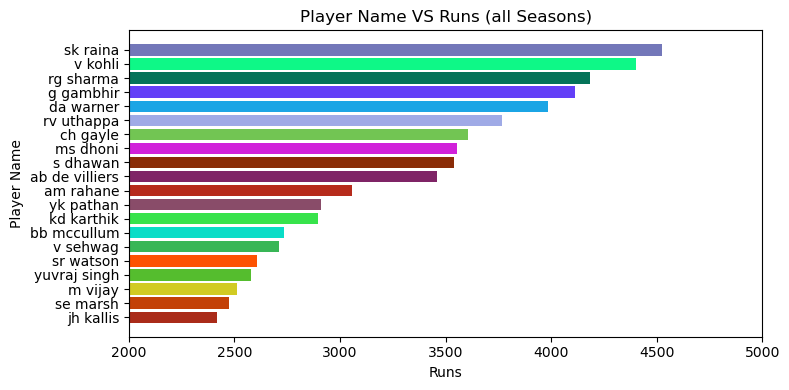

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
import matplotlib.colors as pltc

top_scoring_batsmen_per_season_pd = top_scoring_batsmen_per_season.toPandas()
top_scoring = top_scoring_batsmen_per_season_pd.nlargest(20,'total_runs')
fig,ax = plt.subplots(figsize=(8,4))


col = [(np.random.random(), np.random.random(), np.random.random()) for _ in range(top_scoring.shape[0])]

ax.barh(top_scoring['player_name'],top_scoring['total_runs'],color=col)
ax.set_ylabel('Player Name')
ax.set_xlabel('Runs')
ax.set_xlim([2000,5000])
ax.set_title('Player Name VS Runs (all Seasons)')
plt.tight_layout()
plt.gca().invert_yaxis()

In [28]:
top_scoring.shape[0]

20

In [29]:
toss_impact_individual_matches = spark.sql("""
SELECT 
    m.Toss_Winner,
    m.match_winner,
    CASE 
        WHEN m.Toss_Winner = m.match_winner THEN 'WON' 
        ELSE 'LOSS' 
    END AS toss_impact
FROM 
    match m 
WHERE 
    m.Toss_Winner IS NOT NULL
""")
toss_impact_individual_matches.show()

+--------------------+--------------------+-----------+
|         Toss_Winner|        match_winner|toss_impact|
+--------------------+--------------------+-----------+
|Royal Challengers...|Kolkata Knight Ri...|       LOSS|
| Chennai Super Kings| Chennai Super Kings|        WON|
|    Rajasthan Royals|    Delhi Daredevils|       LOSS|
|      Mumbai Indians|Royal Challengers...|       LOSS|
|     Deccan Chargers|Kolkata Knight Ri...|       LOSS|
|     Kings XI Punjab|    Rajasthan Royals|       LOSS|
|     Deccan Chargers|    Delhi Daredevils|       LOSS|
|      Mumbai Indians| Chennai Super Kings|       LOSS|
|    Rajasthan Royals|    Rajasthan Royals|        WON|
|      Mumbai Indians|     Kings XI Punjab|       LOSS|
|    Rajasthan Royals|    Rajasthan Royals|        WON|
|Kolkata Knight Ri...| Chennai Super Kings|       LOSS|
|     Deccan Chargers|     Deccan Chargers|        WON|
|    Delhi Daredevils|     Kings XI Punjab|       LOSS|
| Chennai Super Kings| Chennai Super Kings|     

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Chennai Super Kings'),
  Text(2, 0, 'Rajasthan Royals'),
  Text(3, 0, 'Mumbai Indians'),
  Text(4, 0, 'Deccan Chargers'),
  Text(5, 0, 'Kings XI Punjab'),
  Text(6, 0, 'Kolkata Knight Riders'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Kochi Tuskers Kerala'),
  Text(9, 0, 'Pune Warriors'),
  Text(10, 0, 'Sunrisers Hyderabad'),
  Text(11, 0, 'Gujarat Lions'),
  Text(12, 0, 'Rising Pune Supergiants'),
  Text(13, 0, 'Rising Pune Supergiant')])

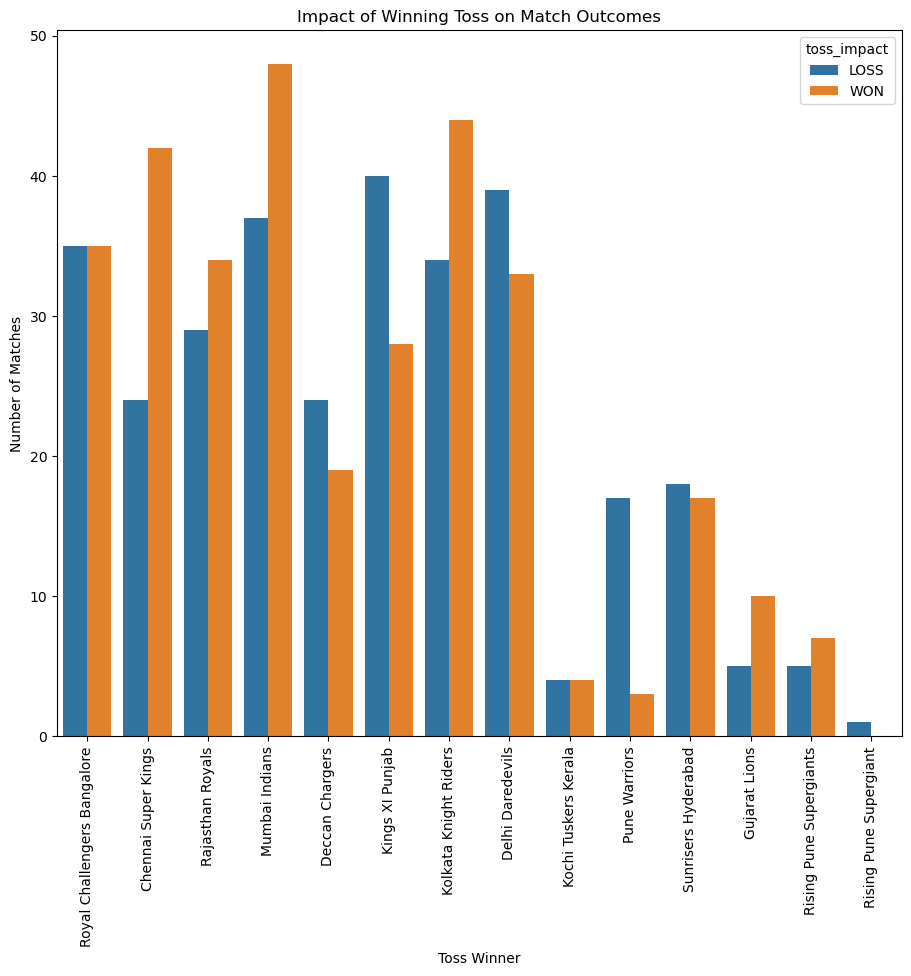

In [30]:
import seaborn as sns
toss_impact_pd = toss_impact_individual_matches.toPandas()
plt.figure(figsize=(10,8))
sns.countplot(toss_impact_pd,x='Toss_Winner',hue='toss_impact',gap=0)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.tight_layout()
plt.xticks(rotation=90)

In [31]:
scores_by_venue = spark.sql("""
SELECT
m.Venue_Name,
SUM(b.runs_scored) AS total_runs
from match m
JOIN ball_by_ball b ON b.match_id = m.match_id
WHERE Venue_Name!='NULL'
GROUP BY m.Venue_Name
ORDER BY SUM(b.runs_scored) DESC
""")
scores_by_venue.show(100,truncate=False)

+---------------------------------------------------+----------+
|Venue_Name                                         |total_runs|
+---------------------------------------------------+----------+
|M Chinnaswamy Stadium                              |19324     |
|Feroz Shah Kotla                                   |17428     |
|Eden Gardens                                       |17072     |
|Wankhede Stadium                                   |16899     |
|MA Chidambaram Stadium, Chepauk                    |14387     |
|Punjab Cricket Association Stadium, Mohali         |13793     |
|Rajiv Gandhi International Stadium, Uppal          |11661     |
|Sawai Mansingh Stadium                             |9178      |
|Maharashtra Cricket Association Stadium            |4531      |
|Subrata Roy Sahara Stadium                         |4492      |
|Dr DY Patil Sports Academy                         |4465      |
|Kingsmead                                          |4060      |
|Brabourne Stadium       

C:\Users\manas\AppData\Local\Temp\ipykernel_10784\630477096.py:4: UserWarning: 
The palette list has fewer values (10) than needed (35) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=scores_by_venue_pd, y='Venue_Name', x='total_runs', hue='Venue_Name',legend=False,palette=palette_color)


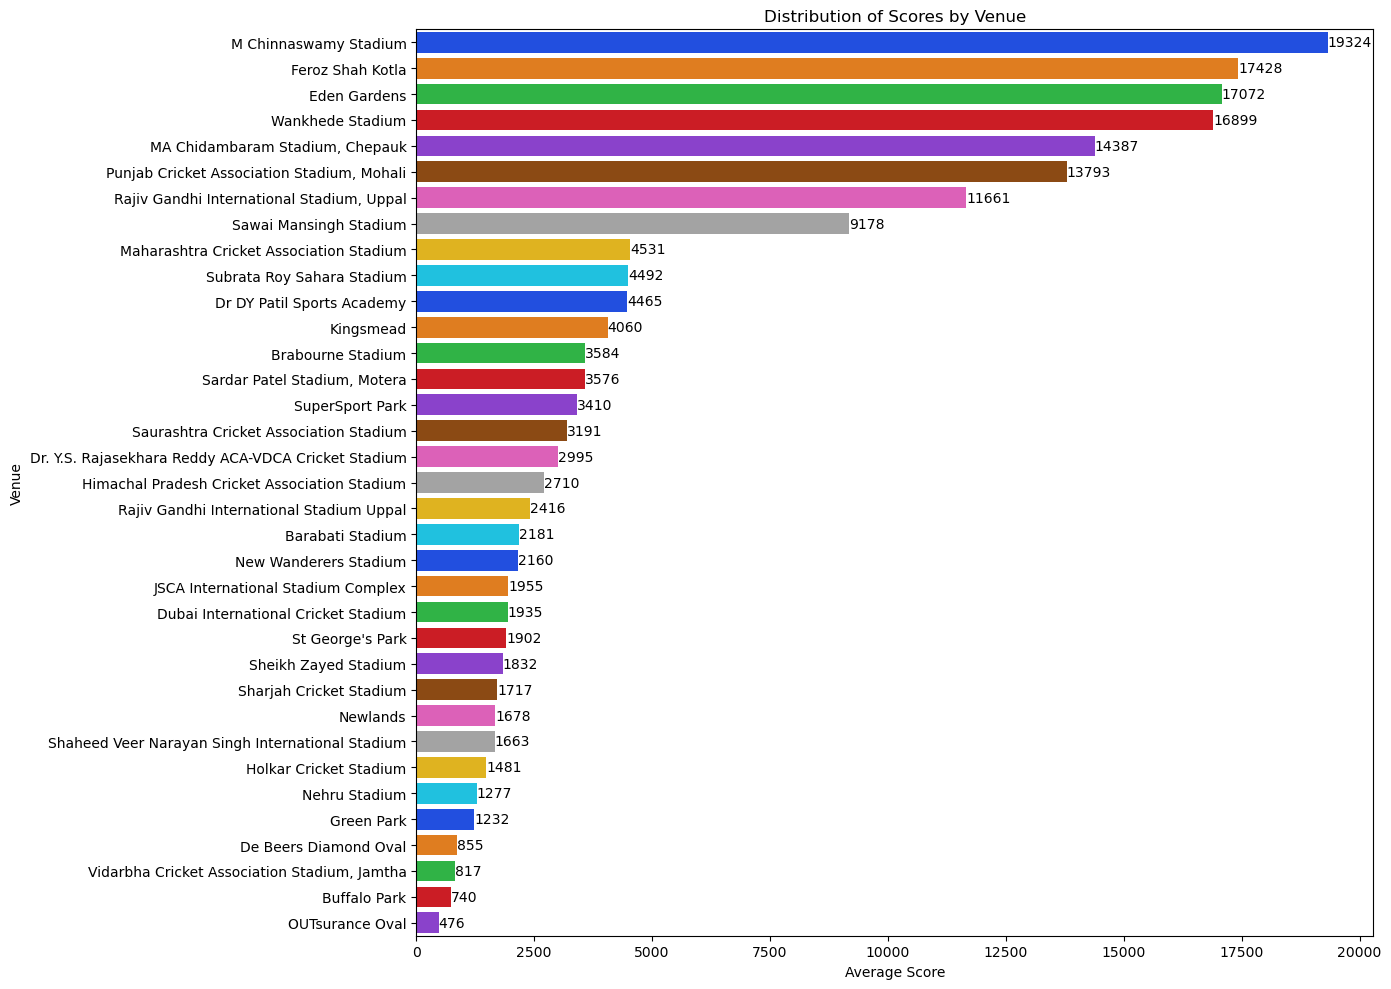

In [32]:
scores_by_venue_pd = scores_by_venue.toPandas()
plt.figure(figsize=(14,10))
palette_color = sns.color_palette('bright') 
ax = sns.barplot(data=scores_by_venue_pd, y='Venue_Name', x='total_runs', hue='Venue_Name',legend=False,palette=palette_color)
for i in ax.containers:
    ax.bar_label(i, fontsize=10);
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.tight_layout()
plt.ylabel('Venue')
plt.show()

In [33]:
dismissal_types = spark.sql("""
SELECT
out_type,
count(out_type) AS DISMISSAL_COUNT
FROM ball_by_ball
WHERE out_type != 'Not Applicable'
GROUP BY out_type
ORDER BY COUNT(*) DESC
""")
dismissal_types.show()

+--------------------+---------------+
|            out_type|DISMISSAL_COUNT|
+--------------------+---------------+
|              caught|           3678|
|              bowled|           1382|
|             run out|            744|
|        Keeper Catch|            695|
|                 lbw|            455|
|             stumped|            222|
|   caught and bowled|            211|
|          hit wicket|              9|
|        retired hurt|              9|
|obstructing the f...|              1|
+--------------------+---------------+



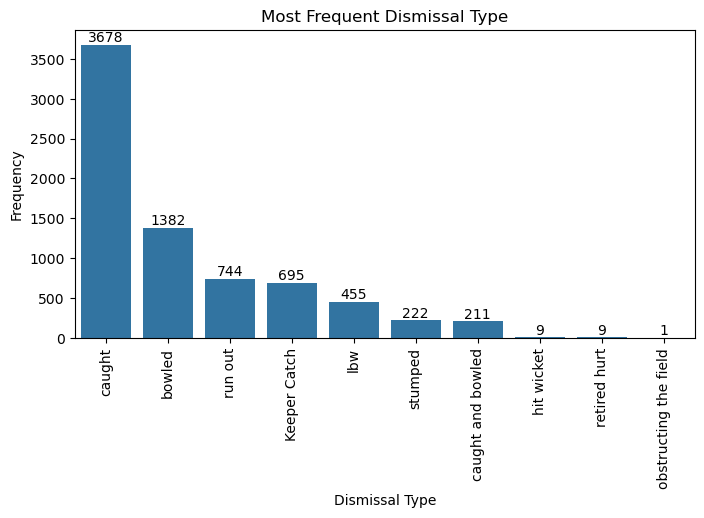

In [34]:
dismissal_types_pd = dismissal_types.toPandas()

plt.figure(figsize=(8,4))
ax = sns.barplot(dismissal_types_pd, x='out_type',y= 'DISMISSAL_COUNT')
for i in ax.containers:
    plt.bar_label(i)
ax.set_title("Most Frequent Dismissal Type")
ax.set_xlabel("Dismissal Type")
ax.set_ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [35]:
foreign_player_most_belongs = spark.sql("""
SELECT
Country_Name,
COUNT(*) AS Count_of_foreign_players_belongs
FROM player
WHERE Country_Name != 'India'
GROUP BY Country_Name
ORDER BY COUNT(*) DESC
""")
foreign_player_most_belongs.show()

+------------+--------------------------------+
|Country_Name|Count_of_foreign_players_belongs|
+------------+--------------------------------+
|   Australia|                              74|
|South Africa|                              40|
| New Zealand|                              25|
|   Sri Lanka|                              20|
| West Indies|                              20|
|     England|                              18|
|    Pakistan|                              13|
|  Bangladesh|                               5|
| Afghanistan|                               2|
|   Zimbabwea|                               2|
| Netherlands|                               1|
+------------+--------------------------------+



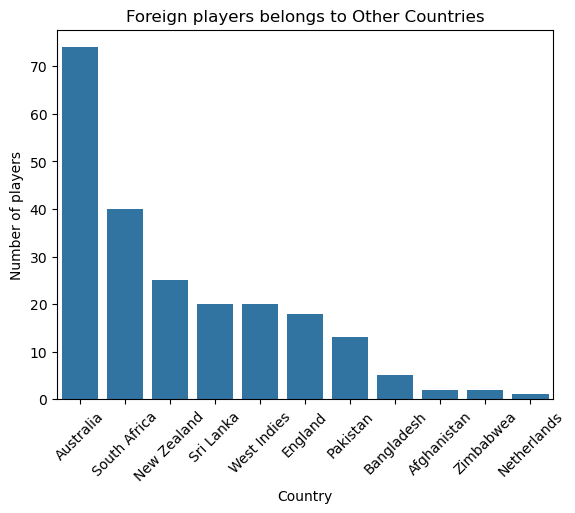

In [36]:
foreign_player_most_belongs_pd = foreign_player_most_belongs.toPandas()
sns.barplot(foreign_player_most_belongs_pd,x='Country_Name',y='Count_of_foreign_players_belongs')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Foreign players belongs to Other Countries')
plt.show()

In [37]:
top_wicket_takers = spark.sql("""
SELECT
    b.bowler,
    p.Player_Name,
    COUNT(b.bowler) AS number_of_wickets
FROM
    ball_by_ball b
JOIN
    player p
ON
    p.player_id = b.bowler
WHERE
    out_type != 'Not Applicable'
GROUP BY
    b.bowler, p.Player_Name
ORDER BY
    COUNT(b.bowler) DESC
""")

top_wicket_takers.show()


+------+---------------+-----------------+
|bowler|    Player_Name|number_of_wickets|
+------+---------------+-----------------+
|   194|     sl malinga|              168|
|   136|       a mishra|              142|
|    71|       dj bravo|              136|
|    67|      pp chawla|              133|
|    50|harbhajan singh|              132|
|    81|  r vinay kumar|              124|
|    73|        a nehra|              120|
|    15|         z khan|              119|
|   299|        b kumar|              117|
|   315|      sp narine|              109|
|   232|       ut yadav|              107|
|   201|       r ashwin|              107|
|    14|        p kumar|              102|
|    61|       rp singh|              100|
|    94|       dw steyn|              100|
|    32|      sr watson|               99|
|    29|      ik pathan|               99|
|   131|        pp ojha|               98|
|   109|      ja morkel|               96|
|   364|      mm sharma|               91|
+------+---

C:\Users\manas\AppData\Local\Temp\ipykernel_10784\1649967824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(most_wickets,y='Player_Name',x='number_of_wickets',palette=palette_color)


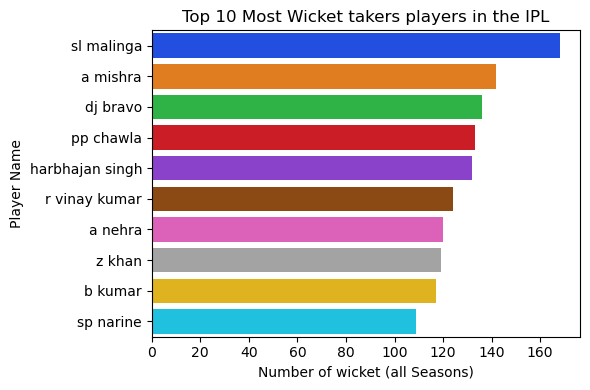

In [42]:
top_wicket_takers_pd = top_wicket_takers.toPandas()
most_wickets = top_wicket_takers_pd.nlargest(10,"number_of_wickets")
fig,ax = plt.subplots(figsize=(6,4))
# palette_color
ax = sns.barplot(most_wickets,y='Player_Name',x='number_of_wickets',palette=palette_color)
# for i in ax.containers:
#     ax.bar_label(i)
ax.set_xlabel('Number of wicket (all Seasons)')
ax.set_ylabel("Player Name")
ax.set_title("Top 10 Most Wicket takers players in the IPL")
plt.tight_layout()
plt.show()

In [39]:
most_runs_in_one_match = spark.sql("""
SELECT
    d.*,
    m.Team1,
    m.Team2
FROM
    match m
JOIN
    (SELECT
        m.match_id,
        SUM(b.runs_scored) AS total_runs
    FROM
        ball_by_ball b
    JOIN
        match m
    ON
        b.match_id = m.match_id
    GROUP BY
        m.match_id
    ORDER BY
        SUM(b.runs_scored) DESC) d
ON
    m.match_id = d.match_id
ORDER BY total_runs DESC
""")

most_runs_in_one_match.show()


+--------+----------+--------------------+--------------------+
|match_id|total_runs|               Team1|               Team2|
+--------+----------+--------------------+--------------------+
|  419142|       447| Chennai Super Kings|    Rajasthan Royals|
|  335988|       426|     Kings XI Punjab| Chennai Super Kings|
|  829800|       419|      Mumbai Indians|Royal Challengers...|
| 1082641|       419|      Mumbai Indians|     Kings XI Punjab|
|  335995|       417|     Deccan Chargers|    Rajasthan Royals|
|  501228|       408|    Delhi Daredevils|     Kings XI Punjab|
| 1082632|       405|    Delhi Daredevils|       Gujarat Lions|
|  733992|       404|     Kings XI Punjab| Chennai Super Kings|
|  419112|       399|      Mumbai Indians|    Rajasthan Royals|
|  734052|       397| Chennai Super Kings|     Kings XI Punjab|
| 1082610|       393|       Gujarat Lions|Royal Challengers...|
|  548377|       392|    Delhi Daredevils|Royal Challengers...|
|  729288|       390| Chennai Super King

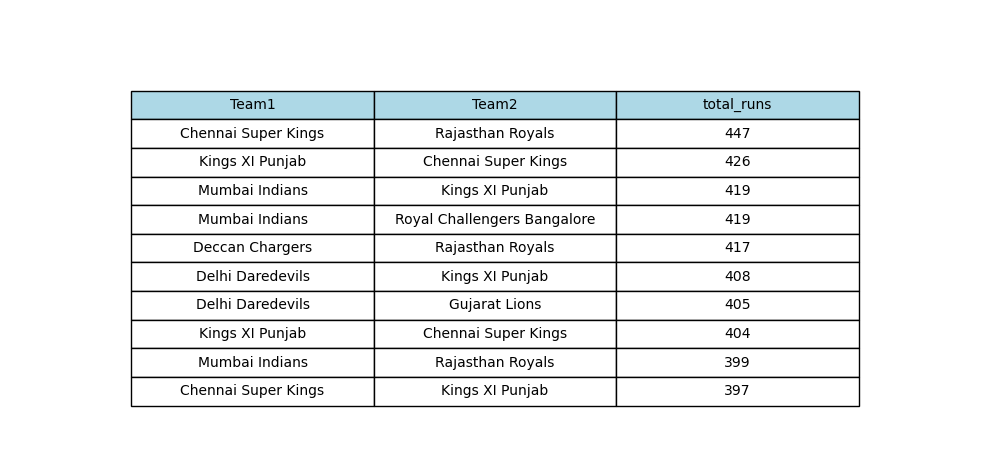

In [40]:
most_runs_in_one_match_pd = most_runs_in_one_match.toPandas()
highest_runs_target = most_runs_in_one_match_pd.nlargest(10, 'total_runs')
highest_runs_target = highest_runs_target.drop('match_id', axis=1)
highest_runs_target = highest_runs_target.loc[:, ['Team1', 'Team2', 'total_runs']]

fig, ax = plt.subplots(figsize=(10, 12 / 2.5))
data_table = ax.table(cellText=highest_runs_target.values,cellLoc='center', 
                      colLabels=highest_runs_target.columns, loc='center', 
                      edges='closed',colColours =['lightblue'] * 3,
                      colWidths=[0.25,0.25,0.25,0.25])
data_table.scale(1, 1.5)
fig.patch.set_visible(False)
ax.axis('off')
ax.set_title("Highest Scores in IPL Matches", size=16, fontdict={'fontweight': 'bold','color':'white'})
data_table.auto_set_font_size(False)
data_table.set_fontsize(10)
fig.tight_layout()
ax.set_facecolor('blue')
# data_table.set_facecolor('lightgrey')

fig.savefig("hello")